In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x=df.iloc[:,:-1]
print(x)
y=df.iloc[:,-1]
print(y)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print("Training split input- ", x_train.shape)
print("Testing split input- ", x_test.shape)

Training split input-  (398, 5)
Testing split input-  (171, 5)


In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=0)
dtc.fit(x_train, y_train)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [ ]:
from sklearn.metrics import classification_report
y_pred = dtc.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        63
           1       0.92      0.84      0.88       108

    accuracy                           0.85       171
   macro avg       0.84      0.86      0.85       171
weighted avg       0.86      0.85      0.86       171



In [ ]:
from sklearn.metrics import classification_report
y_pred = dtc.predict(x_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtc.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Train data accuracy: 0.9597989949748744
Test data accuracy: 0.8538011695906432
Accuracy: 0.8538011695906432


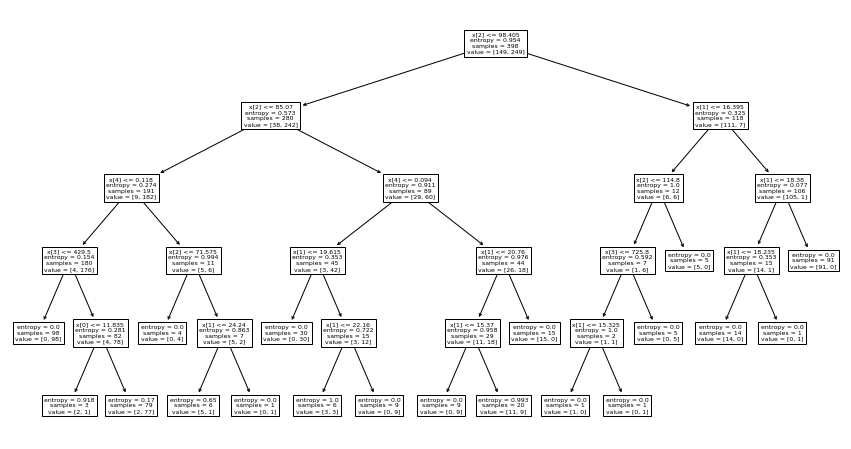

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
from sklearn.tree import plot_tree
plot_tree(dtc)
plt.show()

>1, train: 0.887, test: 0.901
>2, train: 0.887, test: 0.901
>3, train: 0.937, test: 0.895
>4, train: 0.952, test: 0.924
>5, train: 0.955, test: 0.924
>6, train: 0.975, test: 0.906
>7, train: 0.985, test: 0.924
>8, train: 0.997, test: 0.912
>9, train: 0.997, test: 0.924
>10, train: 1.000, test: 0.918
>11, train: 1.000, test: 0.918
>12, train: 1.000, test: 0.918
>13, train: 1.000, test: 0.912
>14, train: 1.000, test: 0.924
>15, train: 1.000, test: 0.912


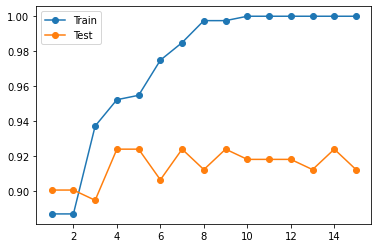

In [ ]:
from matplotlib import pyplot
train_scores, test_scores = list(), list()
values = [i for i in range(1, 16)]
for i in values:
 model = DecisionTreeClassifier(max_depth=i)
 model.fit(x_train, y_train)
 train_yhat = model.predict(x_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 test_yhat = model.predict(x_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()